In [1]:
#importing libaries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#making a list of missing value types
missing_values=["na", "n/a", "__", "?"]

In [3]:
df=pd.read_csv(r"C:\Users\ElBlack\OneDrive - Healthfirst\Desktop\NYPD_Arrest_Data__Year_to_Date__20240501.csv", na_values=missing_values)

In [4]:
# first five rows 
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,280255493,1/10/2024,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,M,26,0,<18,M,BLACK,996342,236149,40.814845,-73.956312,POINT (-73.956312 40.814845)
1,279805419,1/2/2024,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,WHITE HISPANIC,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
2,279895750,1/3/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,106,0,65+,F,WHITE,1026836,180689,40.662526,-73.846499,POINT (-73.846499 40.662526)
3,280809090,1/19/2024,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M,B,49,0,45-64,M,BLACK,1027430,251104,40.855793,-73.843908,POINT (-73.843908 40.855793)
4,280357135,1/11/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,K,81,2,25-44,F,BLACK,1002457,192292,40.694456,-73.934343,POINT (-73.934343 40.694456)


In [5]:
df.dtypes

ARREST_KEY                    int64
ARREST_DATE                  object
PD_CD                       float64
PD_DESC                      object
KY_CD                       float64
OFNS_DESC                    object
LAW_CODE                     object
LAW_CAT_CD                   object
ARREST_BORO                  object
ARREST_PRECINCT               int64
JURISDICTION_CODE             int64
AGE_GROUP                    object
PERP_SEX                     object
PERP_RACE                    object
X_COORD_CD                    int64
Y_COORD_CD                    int64
Latitude                    float64
Longitude                   float64
New Georeferenced Column     object
dtype: object

In [6]:
#Column headers
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

In [7]:
#grouping data by Boro
df.groupby(['ARREST_BORO'])['ARREST_KEY'].count()

ARREST_BORO
B    14221
K    17402
M    15324
Q    13782
S     2892
Name: ARREST_KEY, dtype: int64

In [8]:
#isolating all arrest for Brooklyn
df2=df.loc[df['ARREST_BORO']== 'K']

In [9]:
# first five rows of df2
df2.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
1,279805419,1/2/2024,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,WHITE HISPANIC,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
4,280357135,1/11/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,K,81,2,25-44,F,BLACK,1002457,192292,40.694456,-73.934343,POINT (-73.934343 40.694456)
11,281422833,1/31/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,81,0,25-44,M,BLACK,1005312,190540,40.689640,-73.924051,POINT (-73.924051 40.68964)
12,281438374,1/31/2024,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1500501,F,K,69,0,25-44,M,BLACK,1010576,175628,40.648698,-73.905128,POINT (-73.905128 40.648698)
13,281179458,1/26/2024,244.0,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402501,F,K,77,0,18-24,M,BLACK,1003508,185056,40.674593,-73.930572,POINT (-73.930572 40.674593)


In [10]:
#Grouping Arrest Description in Brooklyn by offense
df2.groupby(['OFNS_DESC'])['ARREST_KEY'].count().sort_values(ascending=False)

OFNS_DESC
ASSAULT 3 & RELATED OFFENSES            2533
MISCELLANEOUS PENAL LAW                 1449
FELONY ASSAULT                          1407
PETIT LARCENY                           1323
DANGEROUS DRUGS                         1305
VEHICLE AND TRAFFIC LAWS                1247
DANGEROUS WEAPONS                        949
CRIMINAL MISCHIEF & RELATED OF           872
ROBBERY                                  856
OTHER OFFENSES RELATED TO THEF           624
GRAND LARCENY                            605
OFFENSES AGAINST PUBLIC ADMINI           456
BURGLARY                                 395
FORGERY                                  343
OFF. AGNST PUB ORD SENSBLTY &            340
SEX CRIMES                               327
OFFENSES INVOLVING FRAUD                 316
CRIMINAL TRESPASS                        267
OTHER TRAFFIC INFRACTION                 230
POSSESSION OF STOLEN PROPERTY            222
INTOXICATED & IMPAIRED DRIVING           202
OTHER STATE LAWS                         186


In [11]:
#isolating all arrest for ASSAULT 3 & RELATED OFFENSES in Brooklyn
df3=df2.loc[df2['OFNS_DESC']=='ASSAULT 3 & RELATED OFFENSES']

In [12]:
df3.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
51,280849034,1/20/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,K,60,0,25-44,M,WHITE HISPANIC,995247,150950,40.580994,-73.960409,POINT (-73.960409 40.580994)
115,280206717,1/9/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,K,83,0,45-64,M,WHITE HISPANIC,1007127,193705,40.698323,-73.917495,POINT (-73.917495 40.698323)
128,279794636,1/1/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200002,M,K,79,2,25-44,F,BLACK,997241,193691,40.698304,-73.953147,POINT (-73.953147 40.698304)
132,280768777,1/19/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,K,69,0,25-44,F,BLACK,1009588,171382,40.637045,-73.908704,POINT (-73.908704 40.637045)
147,280120350,1/7/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,K,66,0,25-44,F,WHITE HISPANIC,985358,168665,40.629624,-73.996005,POINT (-73.996005 40.629624)


In [13]:
#Grouping Brooklyn arrest by Precinct for ASSAULT 3 & RELATED OFFENSES
df3.groupby(['ARREST_PRECINCT'])['ARREST_KEY'].count().sort_values(ascending=False)

ARREST_PRECINCT
75    346
67    207
62    160
73    158
70    145
60    145
79    135
83    112
77    111
71    108
72     98
90     97
81     86
84     84
66     81
69     81
63     73
61     72
88     71
68     55
76     38
78     36
94     34
Name: ARREST_KEY, dtype: int64

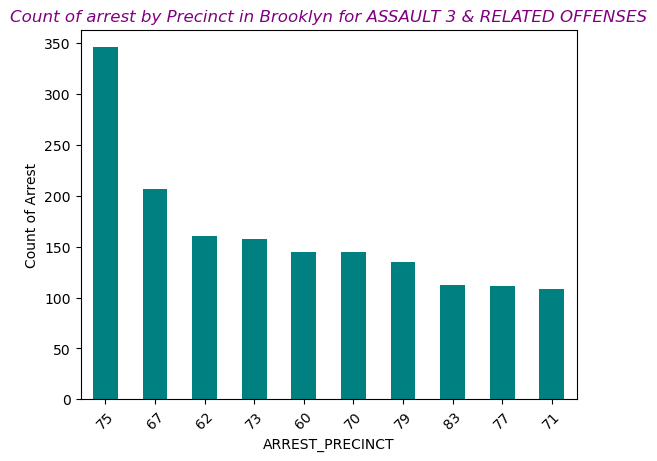

In [14]:
#Charting the number of arrest by Precinct in for Assault 3 & related offenses in Brooklyn
df3['ARREST_PRECINCT'].value_counts() \
.head(10) \
.plot(kind='bar', xlabel = 'ARREST_PRECINCT', rot=45,
      ylabel = 'Count of Arrest', color = 'teal')
plt.title('Count of arrest by Precinct in Brooklyn for ASSAULT 3 & RELATED OFFENSES' \
          , loc='center', color='purple', style='italic')
plt.show()

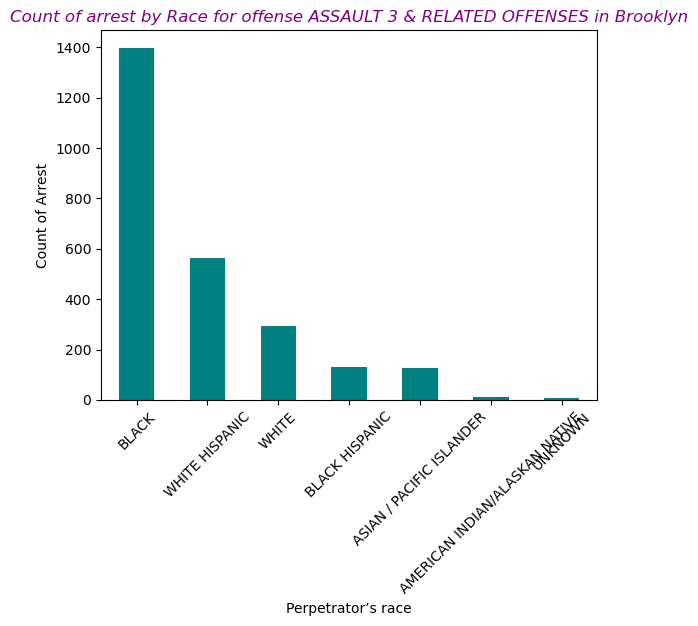

In [15]:
#Charting Brooklyn arrest by Race for Assault 3 & related offenses
df3['PERP_RACE'].value_counts() \
.head(10) \
.plot(kind='bar', xlabel = 'Perpetrator’s race', rot=45,
      ylabel = 'Count of Arrest', color = 'teal')
plt.title('Count of arrest by Race for offense ASSAULT 3 & RELATED OFFENSES in Brooklyn' \
          , loc='center', color='purple', style='italic')
plt.show()

In [16]:
#isolating Black arrest in Brooklyn for ASSAULT 3 & RELATED OFFENSES
df4=df3.loc[df3['PERP_RACE']=='BLACK']

In [17]:
df4.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
128,279794636,1/1/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200002,M,K,79,2,25-44,F,BLACK,997241,193691,40.698304,-73.953147,POINT (-73.953147 40.698304)
132,280768777,1/19/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,K,69,0,25-44,F,BLACK,1009588,171382,40.637045,-73.908704,POINT (-73.908704 40.637045)
160,281218916,1/27/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,K,79,0,25-44,M,BLACK,1000301,192923,40.696192,-73.942116,POINT (-73.942116 40.696192)
179,280191637,1/9/2024,113.0,"MENACING,UNCLASSIFIED",344.0,ASSAULT 3 & RELATED OFFENSES,PL 1201401,M,K,67,0,25-44,M,BLACK,999809,172039,40.638872,-73.943937,POINT (-73.943937 40.638872)
288,281223856,1/27/2024,114.0,OBSTR BREATH/CIRCUL,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1211100,M,K,81,0,45-64,M,BLACK,1004221,188874,40.685070,-73.927991,POINT (-73.927991 40.68507)


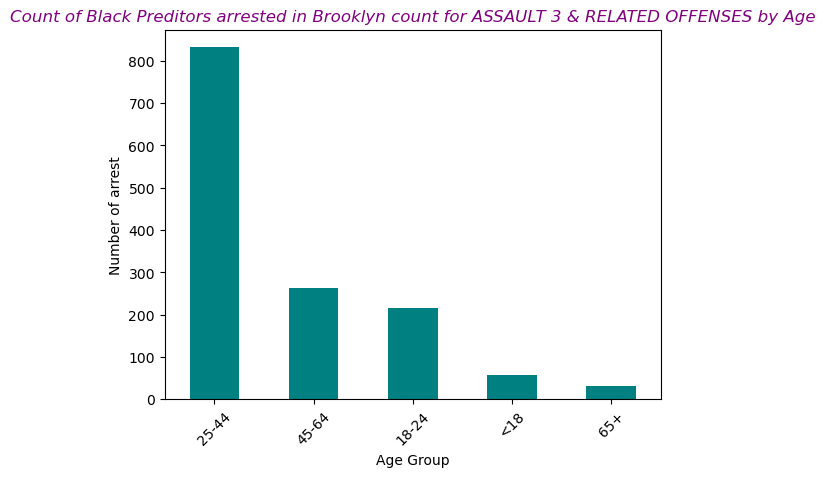

In [18]:
#Charting the age groups of "BLACK" arrest in Brooklyn
df4['AGE_GROUP'].value_counts() \
.head(10) \
.plot(kind='bar', xlabel = 'Age Group', rot=45,
      ylabel = 'Number of arrest', color = 'teal')
plt.title('Count of Black Preditors arrested in Brooklyn count for ASSAULT 3 & RELATED OFFENSES by Age' \
          , loc='center', color='purple', style='italic')
plt.show()

# Conclusion
    The data provided in this data set is bisas as it does not provide the overall population of the people groups arrested. The region with the highest arrest rate was Brooklyn. The greatest offense was Assault 3 &  related offenses. Afircan Americans were the highest preditors and the greatest age group was 25-44.